In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import poisson

In [3]:
archivo = "bn-human-Jung2015_M87126525.edges"

datos = pd.read_csv(archivo,
                      nrows=2000,
                      header = None,
                      sep =" ",
                      usecols=[0,1]
                      ) 

In [4]:
G = nx.from_pandas_edgelist(datos, source = 0, target = 1)

In [13]:
#Se hace un diccionario en donde se guarda el grado de los nodos.
diccionario_grado= dict(G.degree)

#Se está seleccionando solo el grado de todos los nodos en G.
grados = [diccionario_grado[i] for i in G]

#Se calculan centralidades de los nodos.
sizes = np.array(grados)

#Centralidad de cercanía.
closeness = nx.closeness_centrality(G)

#Se definen colores con base a la centralidad de cercanía.
colors = np.array([closeness[i] for i in G])

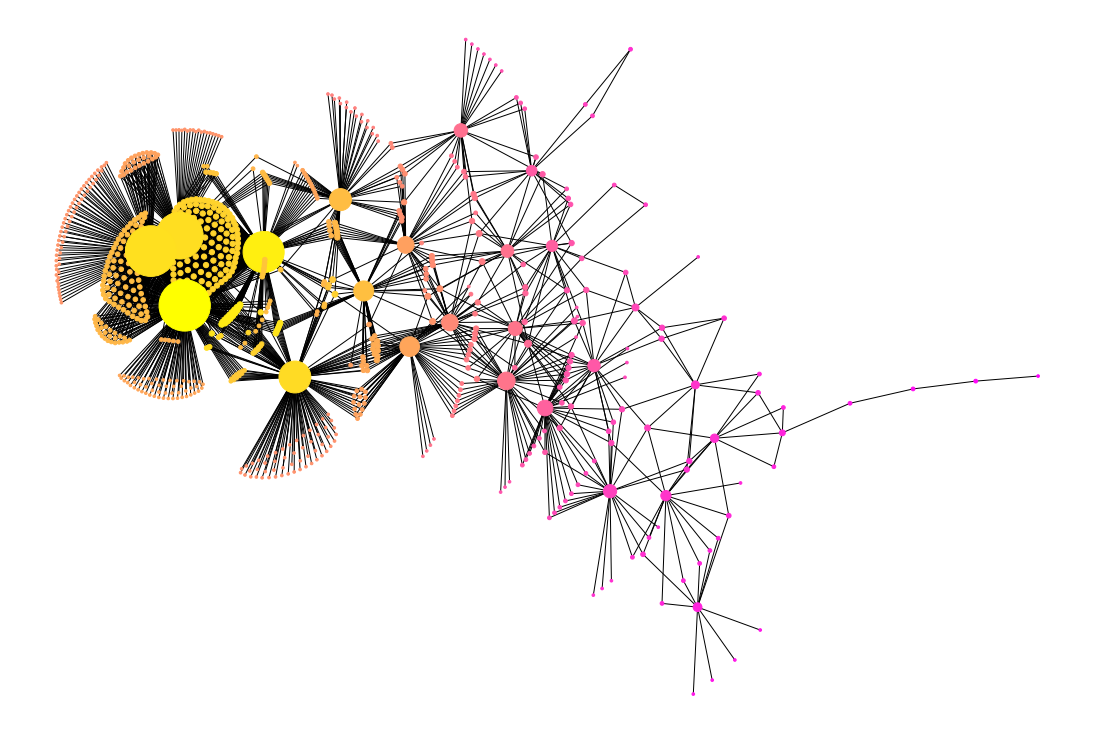

In [15]:
plt.figure(figsize=[15,10])
nx.draw_kamada_kawai(G,
                    node_size=7*sizes,
                    node_color=colors,
                    cmap = "spring"
                    )

# Medidas de centralidad.

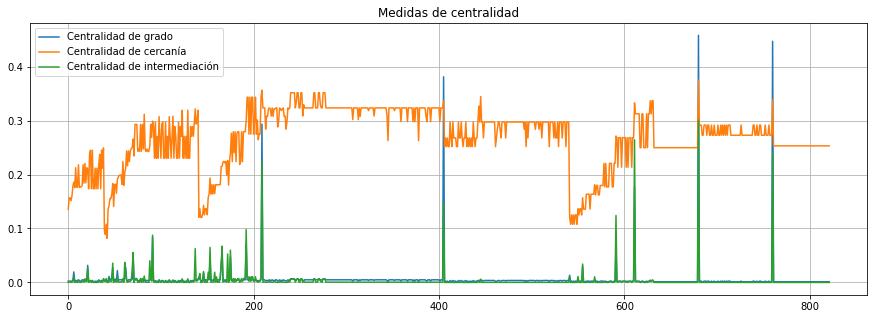

In [18]:
#Centralidad de grado
degree = nx.degree_centrality(G)
d = np.array([degree[i] for i in G])

#Centralidad de cercanía.
closeness = nx.closeness_centrality(G)
c = np.array([closeness[i] for i in G])

#Centralidad de intermediación.
between = nx.betweenness_centrality(G)
b = np.array([between[i] for i in G])

#Centralidad de eigenvector.
#eigenvector = nx.eigenvector_centrality(G)
#e = np.array([eigenvector[i] for i in G])

#Se grafican los resultados.
plt.figure(figsize = [15,5])
plt.grid()
plt.title("Medidas de centralidad")
plt.plot(d, label = "Centralidad de grado")
plt.plot(c, label = "Centralidad de cercanía")
plt.plot(b, label = "Centralidad de intermediación")
#plt.plot(e, label = "Centralidad de eigenvector")
plt.legend()
plt.show()

# Distribución de Grado. 

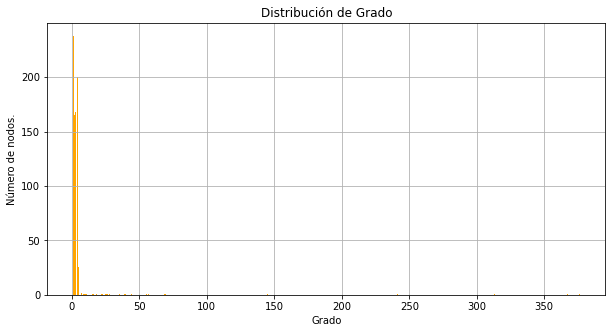

In [6]:
#Se hace un diccionario en donde se guarda el grado de los nodos.
diccionario_grado= dict(G.degree)

#Se está seleccionando solo el grado de todos los nodos en G.
grados = [diccionario_grado[i] for i in G]

distribucion = {}

#Con este de aquí estamos "llenando" el diccionario vacío en donde los llaves (keys) son los grados de los nodos.
for i in grados:
    distribucion[i]=0

for i in grados:
    distribucion[i]+=1
    
#Se graficarán el número de nodos, n, que tienen grado m.
grado_distribucion = distribucion.keys()
nodo_distribucion = distribucion.values()

#Se grafica en un histograma el resultado.
plt.figure(figsize = [10,5])
plt.bar(grado_distribucion, nodo_distribucion,color='orange')
plt.title('Distribución de Grado'), plt.xlabel("Grado"), plt.ylabel("Número de nodos."), plt.grid()
plt.show()